In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

In [51]:
data=pd.read_csv("hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [52]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [53]:
data.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

data = data.drop(['instant','dteday','yr'], axis=1)

In [54]:
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')

data.dtypes

season        category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [55]:
data.isnull().any()

season        False
month         False
hour          False
holiday       False
weekday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

[Text(0.5,1,'Use of the system during weekdays and weekends')]

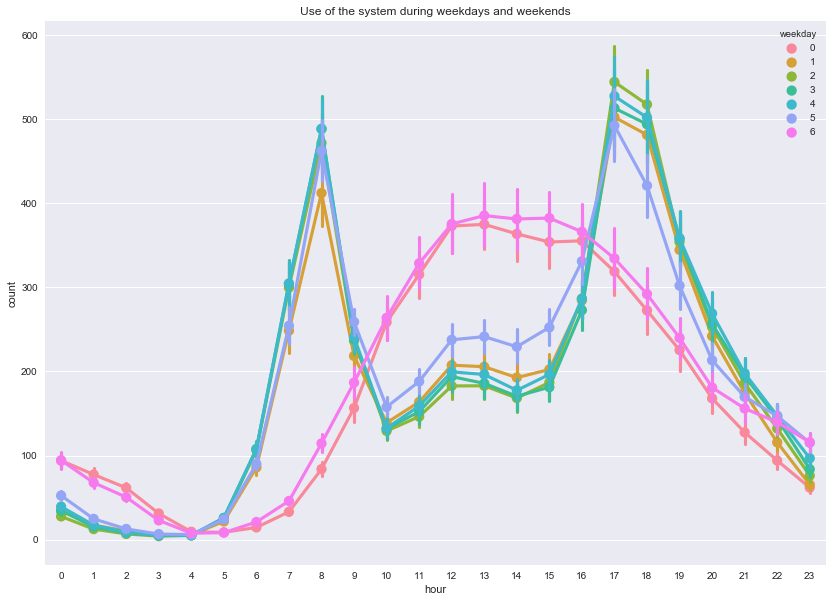

In [56]:
fig, ax = plt.subplots(figsize=(14,10))
sns.pointplot(data=data[['hour',
                       'count',
                       'weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")

We can see that usage is different on work days and on weekends. On Sundays and Saturdays, people use more the bikes during afternoon, while during work days, bikes are mostly used during early hours of morning and evening.

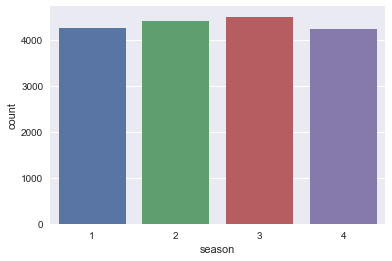

In [57]:
sns.set(style="darkgrid")
ax=sns.countplot(x="season",data=data)
ax

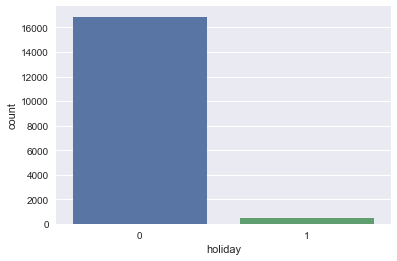

In [58]:
sns.set(style="darkgrid")
ax=sns.countplot(x="holiday",data=data)
ax

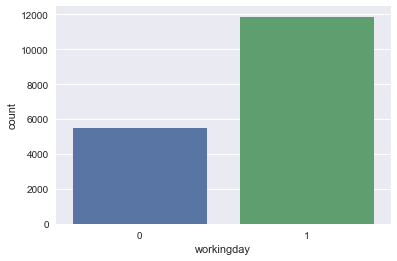

In [59]:
sns.set(style="darkgrid")
ax=sns.countplot(x="workingday",data=data)
ax

[Text(0.5,1,'Use of the system by casual users')]

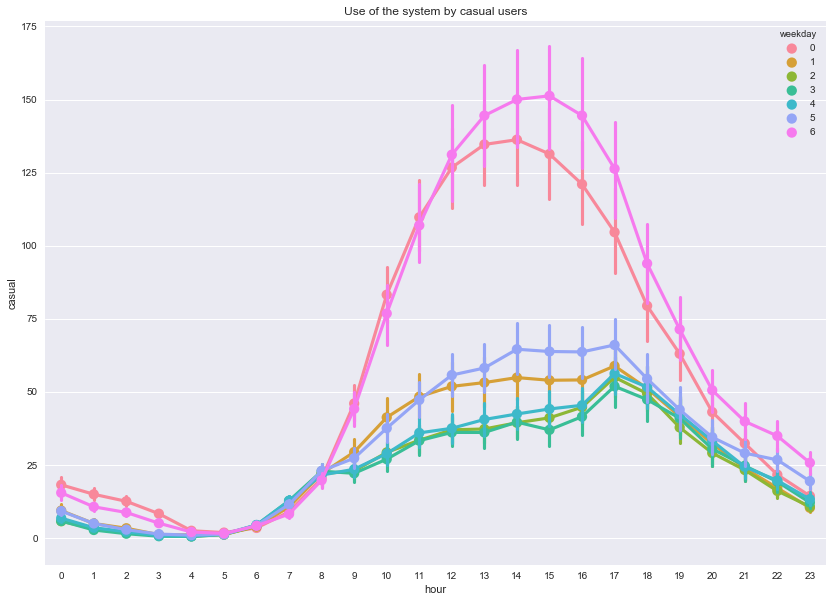

In [60]:
fig, ax = plt.subplots(figsize=(14,10))
sns.pointplot(data=data[['hour',
                       'casual',
                       'weekday']],
            x='hour', y='casual',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by casual users")

[Text(0.5,1,'Use of the system by registered users')]

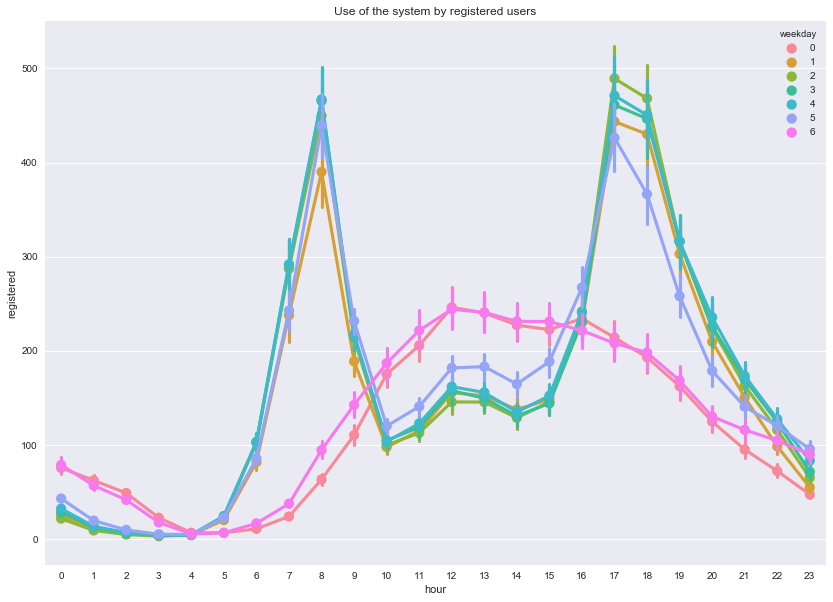

In [61]:
fig, ax = plt.subplots(figsize=(14,10))
sns.pointplot(data=data[['hour',
                       'registered',
                       'weekday']],
            x='hour', y='registered',
            hue='weekday', ax=ax)
ax.set(title="Use of the system by registered users")

we see that casual users tend to use the bikes during afternoon during the all week, while registered users follow the first graph pattern (leisure on weekends and to go to work on weekdays).

[Text(0.5,1,'Use of the system: weather condition')]

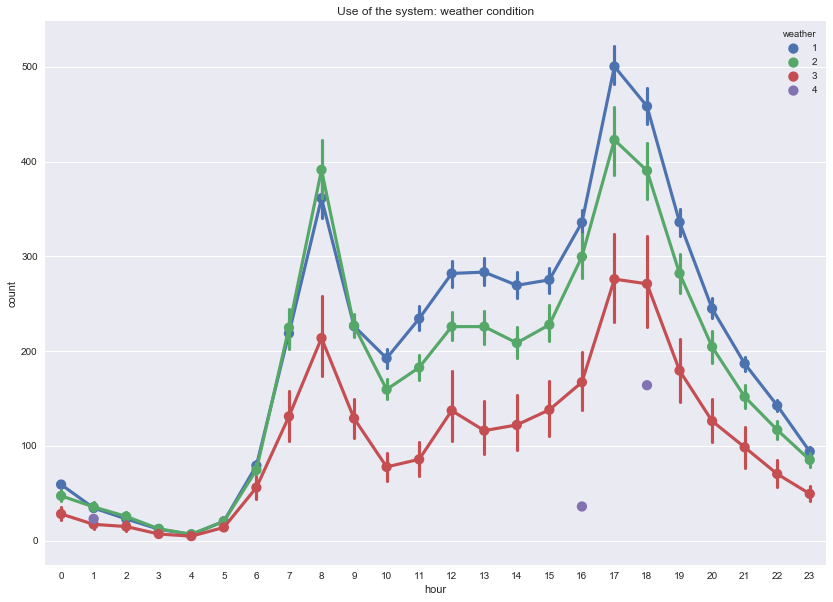

In [62]:
fig, ax = plt.subplots(figsize=(14,10))
sns.pointplot(data=data[['hour',
                       'count',
                       'weather']],
            x='hour', y='count',
            hue='weather', ax=ax)
ax.set(title="Use of the system: weather condition")

[Text(0.5,1,'Use of the system: season')]

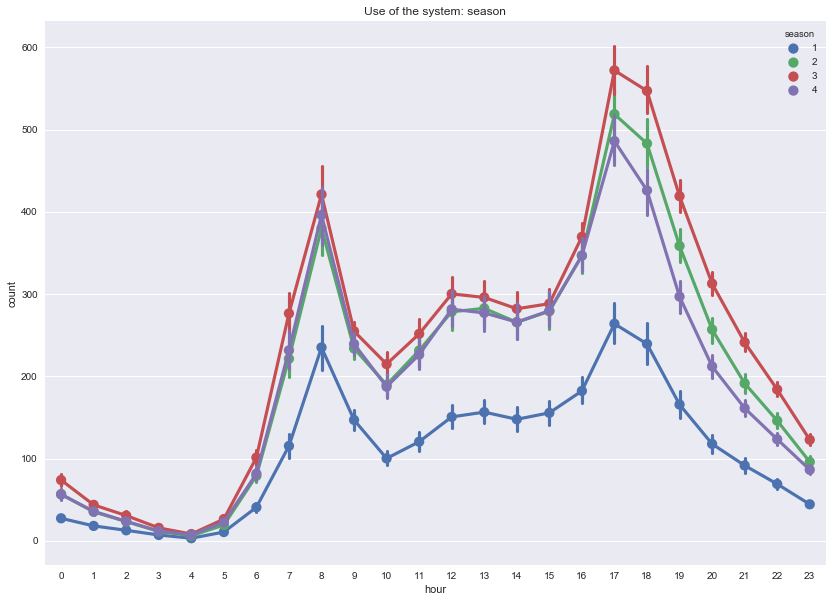

In [63]:
fig, ax = plt.subplots(figsize=(14,10))
sns.pointplot(data=data[['hour',
                       'count',
                       'season']],
            x='hour', y='count',
            hue='season', ax=ax)
ax.set(title="Use of the system: season")

we see that people use more the system when it’s sunny and during Autumn. They tend to use less the bikes during spring time.

[Text(0.5,1,'Monthly distribution')]

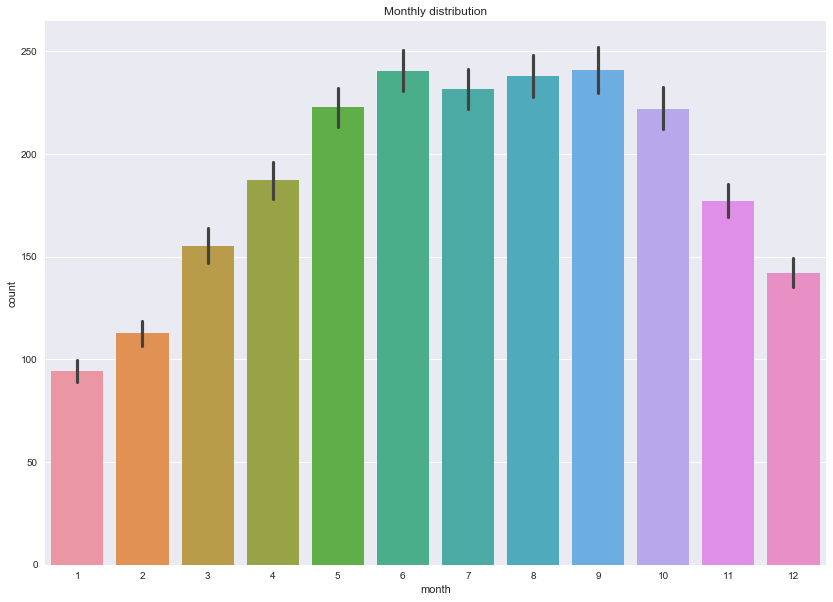

In [64]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=data[['month',
                      'count']],
            x='month', y='count')
ax.set(title="Monthly distribution")

[Text(0.5,1,'Daily distribution')]

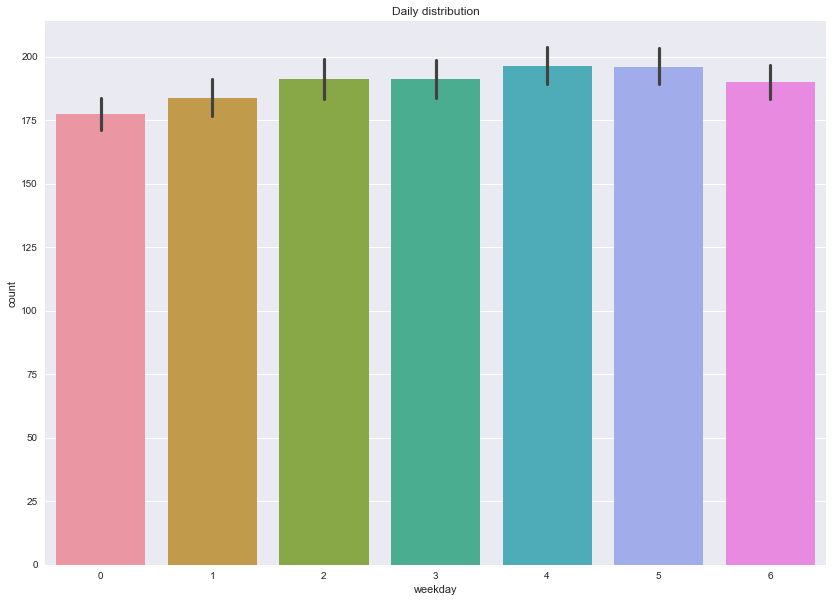

In [65]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=data[['weekday',
                      'count']],
            x='weekday', y='count')
ax.set(title="Daily distribution")

There is not much difference of daily distribution when compared to monthly distribution. 

# CORRELATION CHECK

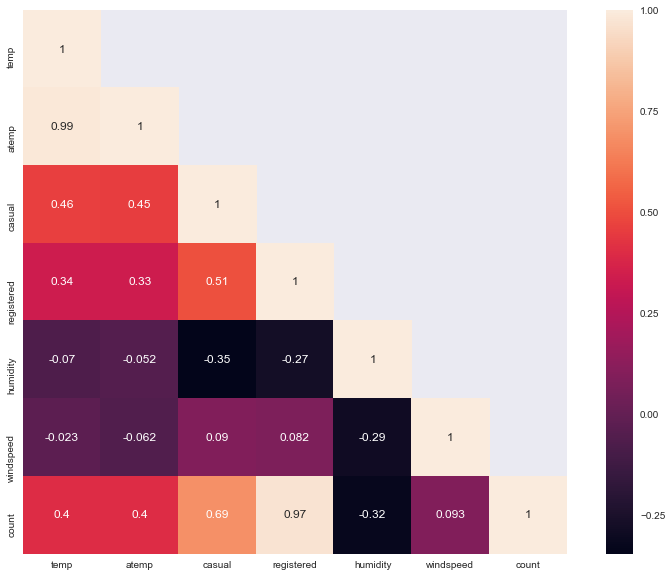

In [66]:
data_correlation = data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(14,10))
sns.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

Here temp and atemp are highly correlated, so we are removing atemp from data.
Windspeed correlation with count feature is very low, so we can remove it as we no longer use it in model. 


In [67]:
data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

[Text(0.5,1,'Relation between humidity and total users')]

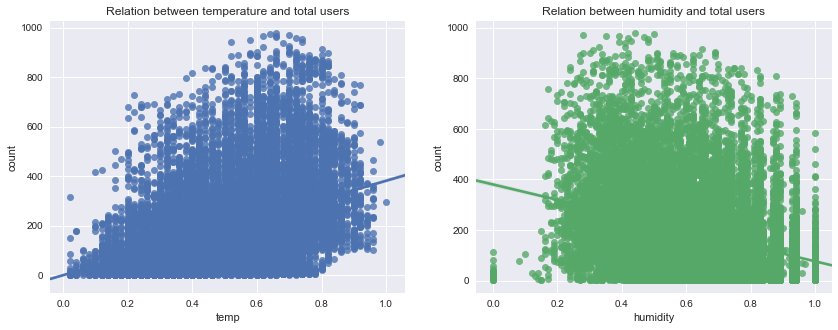

In [68]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,5))
sns.regplot(x=data['temp'], y=data['count'], ax=ax1)
ax1.set(title="Relation between temperature and total users")
sns.regplot(x=data['humidity'], y=data['count'], ax=ax2)
ax2.set(title="Relation between humidity and total users")

Outlier check

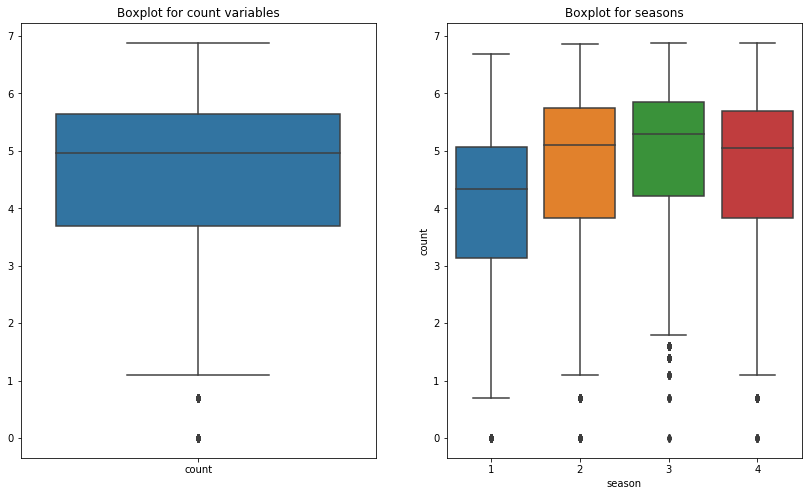

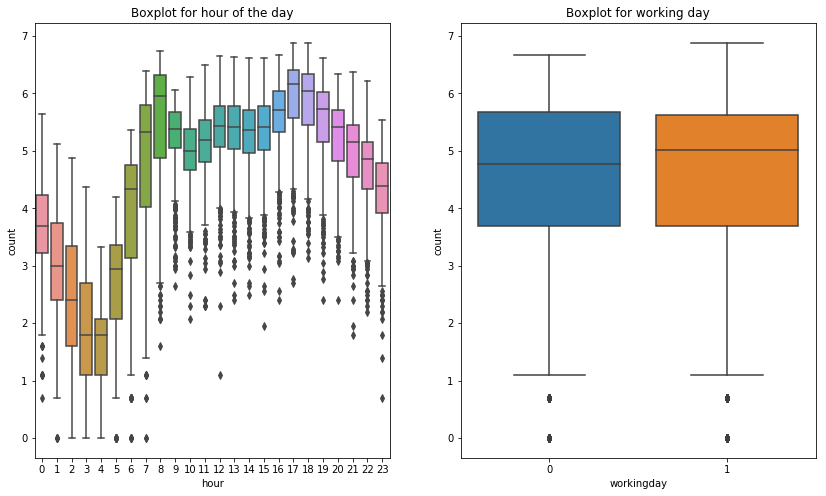

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,8))
sns.boxplot(data=data[['count']], ax=ax1)
ax1.set(title="Boxplot for count variables")
sns.boxplot(x=data['season'],y=data['count'], ax=ax2)
ax2.set(title="Boxplot for seasons")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,8))
ax1.set(title="Boxplot for hour of the day")
sns.boxplot(x=data['hour'],y=data['count'], ax=ax1)
ax2.set(title="Boxplot for working day")
sns.boxplot(x=data['workingday'],y=data['count'], ax=ax2)

G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'Theoretical quantiles')]

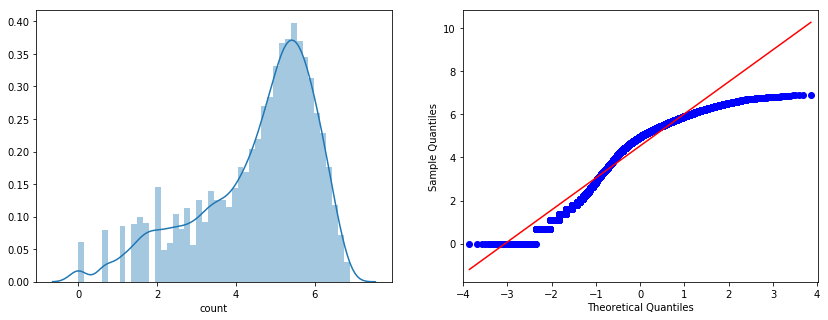

In [39]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,5))
sns.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [29]:
import math
data['count'] = data['count'].transform(lambda x: math.log(x))

G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'Theoretical quantiles')]

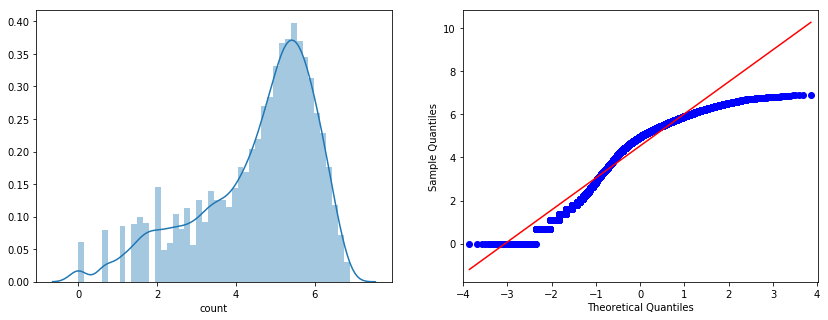

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,5))
sns.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

One-hot encoding

In [34]:
data_dummy = data

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head(1)

,temp,humidity,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.81,2.772589,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

y = data_dummy['count']
X = data_dummy.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.33,
                                                   random_state=42)

In [70]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.609702314940578
R-Squaredon test dataset=0.6114241374998957


G:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


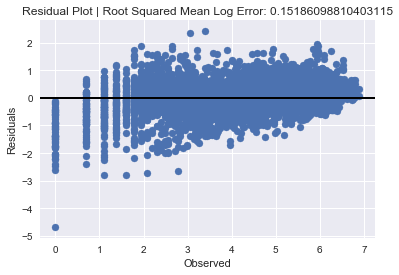

In [71]:
from sklearn.metrics import mean_squared_log_error
 
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print()

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()

In [72]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as sm
print('performance of linear regression')
print('--------------------------------------------------')
print('Mean absolute error = ',round(sm.mean_absolute_error(y_test,y_pred),2))
print('Mean squared error = ',round(sm.mean_squared_error(y_test,y_pred),2))
print('Median absolute error = ',round(sm.median_absolute_error(y_test,y_pred),2))
print('explained variance score = ',round(sm.explained_variance_score(y_test,y_pred),2))
print('R2 score = ',round(sm.r2_score(y_test,y_pred),2))

performance of linear regression
--------------------------------------------------
Mean absolute error =  0.38
Mean squared error =  0.27
Median absolute error =  0.29
explained variance score =  0.88
R2 score =  0.88
